# PROJECT : PREDICTING FLIGHT TIME PERFORMANCES ACROSS THE U.S.

## Project Overview: 

The purpose of this Project is to analyze flight time performances across The United States of America. Also, to predict Airline Delays and their Reasons. 

### About the Data

This Project's Dataset was taken from The United States Department of Transportation's [official-website](https://www.transportation.gov/), under the section Bureau of Transportation Statistics. Click [HERE](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time)to go directly to the website's page where the dataset can be downloaded.

## Opening and Reading into the Dataset.

In this first step we will open and read into the dataset called ** "flight_data.csv"**. We will do this by using a built in python library known as ** pandas**. This enables us to call a method **pd.read_csv()** which enables us to read into the dataset. To learn more about this we can look at the [pandas-documentation](http://pandas.pydata.org/pandas-docs/stable/). 

In [1]:
# Importing the necessary modules
import numpy as np
import pandas as pd

# Display the max rows and columns in a dataframe
pd.set_option("display.max_rows", 999)
pd.set_option('display.max_columns', 150)
pd.set_option('max_colwidth',100)
from IPython.display import display 
%matplotlib inline 

# Reading into the CSV file
data = "flight_data.csv"
flight_data = pd.read_csv(data)

print("Data loaded Successfully")
print("The data has {} samples with {} features each".format(*flight_data.shape))

/Users/Deepak/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data loaded Successfully
The data has 445827 samples with 110 features each


From the Printed Lines above the data has been readed into successfully. We can begin to look at what the data looks like. We can do this by printing the first few rows of our dataset by calling the **.head()** method, Like below:

In [2]:
flight_data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration 

In the earlier section we read into the dataset. In this section we will dive deeper which will help us learn certain characteristics or aspects about the data. 

Here is the Agenda for this section:
- Data Vizualization (A Map showing all the major airports across the Country)
- Identifying Missing Values within the Dataset
- Analyzing certain aspects about the Data 


#### Graphically Vizualizating Cities with Airports across the US

In this section, we will plot a map showing all the cities with airports across the country of the United States of America. We will plot the map using tools such BaseMap and Geopy.
(Note: Cities are marked with red dots!)

Could not locate Mission/McAllen/Edinburg, TX
Could not locate Scranton/Wilkes-Barre, PA
Could not locate Newport News/Williamsburg, VA
Could not locate Pago Pago, TT
Could not locate Saginaw/Bay City/Midland, MI
Could not locate Sun Valley/Hailey/Ketchum, ID
Could not locate Iron Mountain/Kingsfd, MI
Could not locate Guam, TT
Could not locate North Bend/Coos Bay, OR
Could not locate Harlingen/San Benito, TX
Could not locate Hattiesburg/Laurel, MS
Could not locate Jacksonville/Camp Lejeune, NC
Could not locate New Bern/Morehead/Beaufort, NC


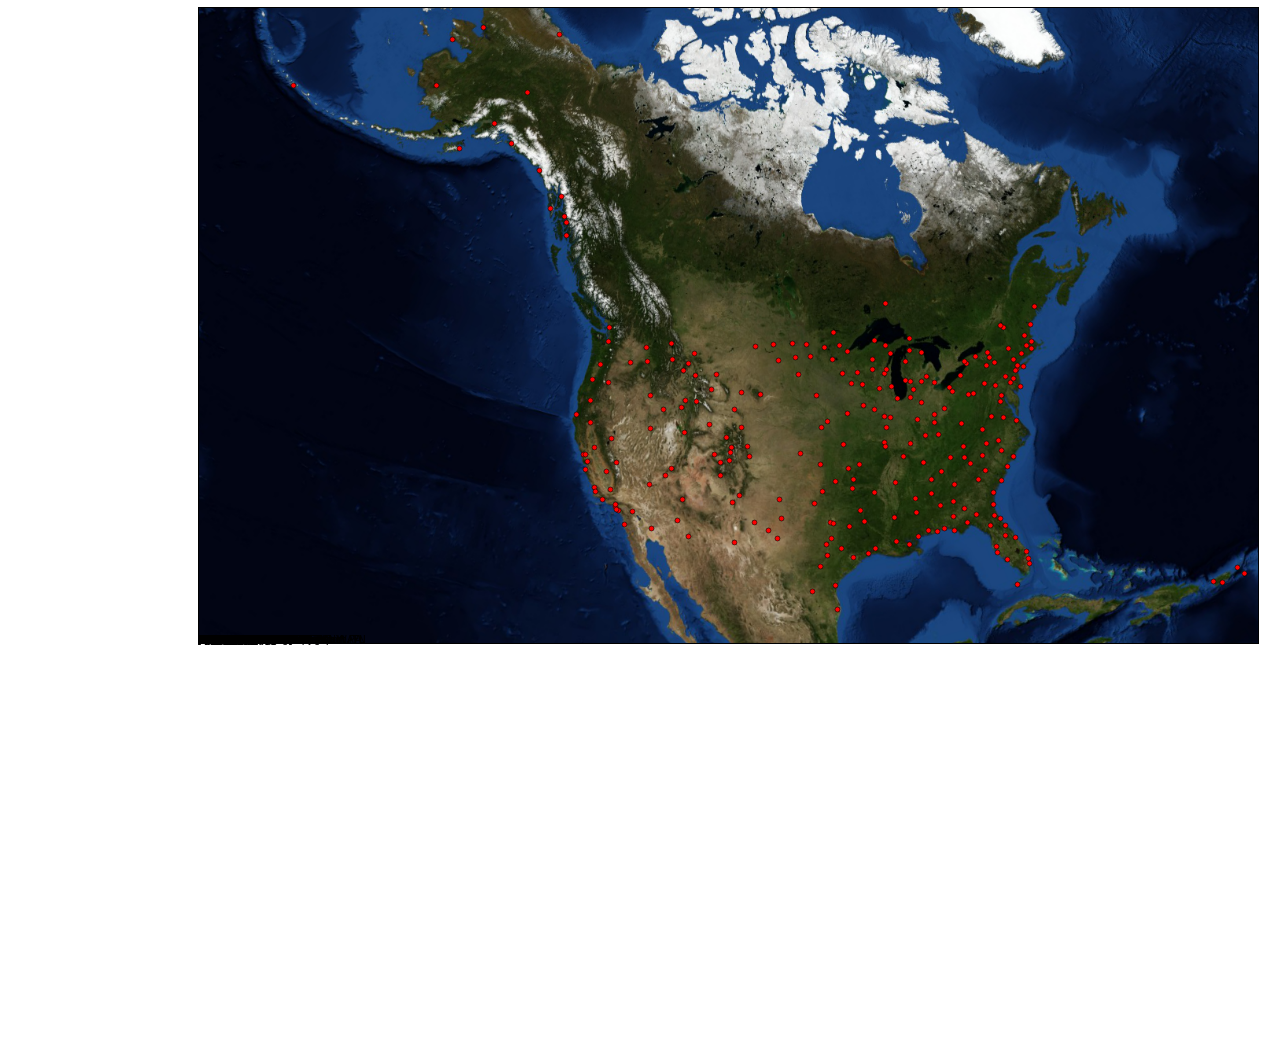

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

city_list = list(flight_data["OriginCityName"].unique())
cities = city_list
scale = 1

map = Basemap(width=10000000,height=6000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
plt.figure(figsize=(19,20))
map.bluemarble()


# Get the location of each city and plot it
geolocator = Nominatim()
for city in cities:
    loc = geolocator.geocode(city)
    if not loc:
        print("Could not locate {}".format(city))
        continue
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=5)
    plt.annotate(city, xy = (x,y), xytext=(-20,20))
plt.show()

Above, we see that map successfully plots the cities of the United States of America. We also see the printed names of the cities that could not be located on the map.


#####  Visualizing the top 10 City Destinations in the US

[<matplotlib.text.Text at 0x114ba2bd0>, <matplotlib.text.Text at 0x114b7ec50>]

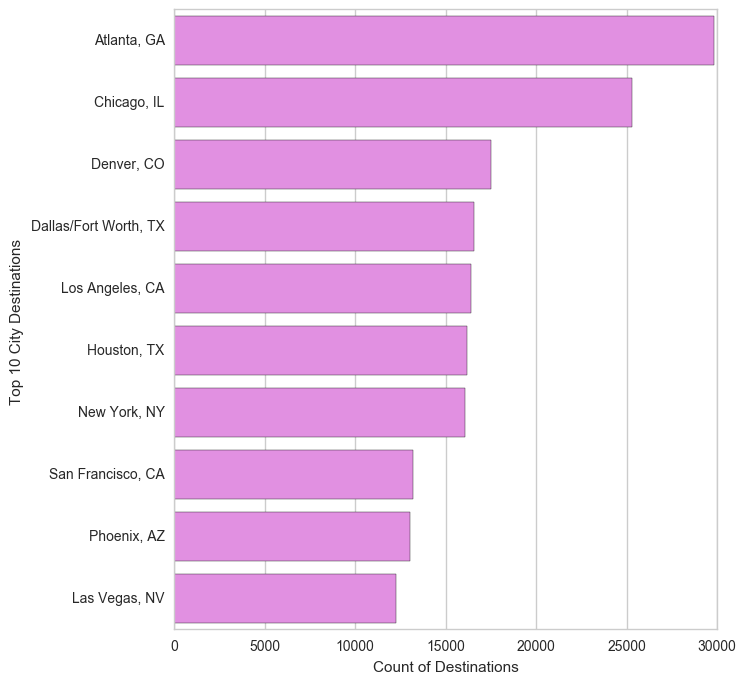

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7,8))

# Load the example car crash dataset
destinations = flight_data["DestCityName"].value_counts()
destination_10_counts = destinations[:10]
indices = destination_10_counts.index
top_10_destinations = indices


sns.set_color_codes("dark")
sns.barplot(x=destination_10_counts, y=top_10_destinations,
            color="violet", orient='h')

ax.set(ylabel="Top 10 City Destinations ",
       xlabel="Count of Destinations")

#### Identifying Missing Values within the dataset 

Before we move any further it is important to see if there is data missing from the dataset. We will identify to see if there are any missing values within the dataset. 

In [3]:
missing_flight_data = flight_data.isnull().sum()
print(missing_flight_data)

Year                         0
Quarter                      0
Month                        0
DayofMonth                   0
DayOfWeek                    0
FlightDate                   0
UniqueCarrier                0
AirlineID                    0
Carrier                      0
TailNum                   4244
FlightNum                    0
OriginAirportID              0
OriginAirportSeqID           0
OriginCityMarketID           0
Origin                       0
OriginCityName               0
OriginState                  0
OriginStateFips              0
OriginStateName              0
OriginWac                    0
DestAirportID                0
DestAirportSeqID             0
DestCityMarketID             0
Dest                         0
DestCityName                 0
DestState                    0
DestStateFips                0
DestStateName                0
DestWac                      0
CRSDepTime                   0
DepTime                  11473
DepDelay                 11473
DepDelay

### A More Detailed Exploration 

In this section, we will be taking a look at characteristics or certain aspects of the data such as departure delays, arrival delays and more... 

Before we begin doing our detailed exploration we will be creating a variable called ** flight_data_explored**. 

(Note: This variable will only be used within the Data Exploration Section)

In [4]:
flight_data_explored = flight_data.copy()
print("Variable for Flight data exploration has been created Successfully!")

Variable for Flight data exploration has been created Successfully!


###### Analyzing Departure Delayed Flights greater than one hundred minutes 

Here we will analyze the flights scheduled for departure with a delay greater than one hundred minutes.

In [5]:
delayed_flights_over_100mins = flight_data_explored[flight_data_explored["DepDelayMinutes"] >= 100]

delayed_flights_100_filtered = delayed_flights_over_100mins[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]

# We only print 5 just to see a sample 
print(display(delayed_flights_100_filtered.head()))

,UniqueCarrier,OriginAirportID,AirlineID,OriginCityName,Origin,DestCityName,Dest
4,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
35,AA,11433,19805,"Detroit, MI",DTW,"Dallas/Fort Worth, TX",DFW
78,AA,14747,19805,"Seattle, WA",SEA,"New York, NY",JFK
97,AA,12478,19805,"New York, NY",JFK,"Seattle, WA",SEA
157,AA,14107,19805,"Phoenix, AZ",PHX,"Dallas/Fort Worth, TX",DFW


None


###### Analyzing Arrival Delayed Flights

Here, we analyze the flights with a delay greater than one hundred minutes. 

In [6]:
arrival_flights_over_100mins = flight_data_explored[flight_data_explored["ArrDelayMinutes"] >= 100]

arrival_flights_100_filtered = arrival_flights_over_100mins[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]

# We only print 5 just to see a sample 
print(display(arrival_flights_100_filtered.head()))

,UniqueCarrier,OriginAirportID,AirlineID,OriginCityName,Origin,DestCityName,Dest
4,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
35,AA,11433,19805,"Detroit, MI",DTW,"Dallas/Fort Worth, TX",DFW
78,AA,14747,19805,"Seattle, WA",SEA,"New York, NY",JFK
157,AA,14107,19805,"Phoenix, AZ",PHX,"Dallas/Fort Worth, TX",DFW
168,AA,14107,19805,"Phoenix, AZ",PHX,"Dallas/Fort Worth, TX",DFW


None


###### Departure Delays for more than 15 minutes

Here we will analyze the flights delayed for departure greater than 15 minutes 

In [7]:
departure_delay_15mins = flight_data_explored[flight_data_explored["DepDel15"] == 1]
departure_delay_15mins_filtered = departure_delay_15mins[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]
print (display(departure_delay_15mins_filtered.head()))

,UniqueCarrier,OriginAirportID,AirlineID,OriginCityName,Origin,DestCityName,Dest
4,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
15,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
24,AA,11298,19805,"Dallas/Fort Worth, TX",DFW,"Detroit, MI",DTW
26,AA,11433,19805,"Detroit, MI",DTW,"Dallas/Fort Worth, TX",DFW
35,AA,11433,19805,"Detroit, MI",DTW,"Dallas/Fort Worth, TX",DFW


None
